# 538 Football Statistics

The website fivethrityeight often share the data behind their articles. One feature of the website is their football ratings. The ratings used are SPI (soccer power index).

In 2009 Nate Silver, founder of fivethirtyeight, wrote this about SPI:

*The SPI rating is designed to provide the best possible objective representation of a team's current overall skill level. In particular, the SPI ratings are intended to be forward-looking: They measure a team's relative likelihood of victory if a competitive match were to be held tomorrow. This concept may differ somewhat from a retrospective or backward-looking ratings system. The SPI ratings are not trying to reward or punish teams based on their past results; rather, they are trying to predict which teams will have the most success going forward.*

As Silver states SPI is forward looking and is used by 538 to judge the probability that teams will win future matches. 

The ultimate goal of this project will be to asses the success of SPI in predicting matches but along the way we are also going to use SPI and the the other statistics in the database (xg, nsxg) to find some interesting football nuggets.

Let's start by taking a quick look at the data:

# Data Exploration

In [1]:
# Read dataset into DF
import pandas as pd
football_data = pd.read_csv("spi_matches.csv")
pd.options.display.max_columns = None
football_data.columns

Index(['season', 'date', 'league_id', 'league', 'team1', 'team2', 'spi1',
       'spi2', 'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2',
       'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1',
       'nsxg2', 'adj_score1', 'adj_score2'],
      dtype='object')

In [2]:
#Print competitons and seasons included
print('Competitions: \n{}'.format(football_data["league"].unique()))
print("\n")
print('Seasons: \n{}'.format(football_data["season"].unique()))

Competitions: 
["FA Women's Super League" 'French Ligue 1' 'Barclays Premier League'
 'Spanish Primera Division' 'Italy Serie A' 'German Bundesliga'
 'UEFA Champions League' 'Mexican Primera Division Torneo Clausura'
 'Major League Soccer' 'Swedish Allsvenskan' 'Norwegian Tippeligaen'
 "National Women's Soccer League" 'Brasileiro Série A'
 'Russian Premier Liga' 'Mexican Primera Division Torneo Apertura'
 'Austrian T-Mobile Bundesliga' 'Swiss Raiffeisen Super League'
 'French Ligue 2' 'German 2. Bundesliga' 'English League Championship'
 'Scottish Premiership' 'Portuguese Liga' 'Dutch Eredivisie'
 'Turkish Turkcell Super Lig' 'Spanish Segunda Division' 'Italy Serie B'
 'Argentina Primera Division' 'UEFA Europa League' 'United Soccer League'
 'Danish SAS-Ligaen' 'Belgian Jupiler League' 'Chinese Super League'
 'Japanese J League' 'English League One'
 'South African ABSA Premier League' 'English League Two'
 'Greek Super League' 'Australian A-League' 'NWSL Challenge Cup']


Seasons: 
[2

In [3]:
# Print first 10 rows
football_data.head(10)

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2016,2016-07-09,7921,FA Women's Super League,Liverpool Women,Reading,51.56,50.42,0.4389,0.2767,0.2844,1.39,1.05,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,2016-07-10,7921,FA Women's Super League,Arsenal Women,Notts County Ladies,46.61,54.03,0.3572,0.3608,0.2819,1.27,1.28,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,2016-07-10,7921,FA Women's Super League,Chelsea FC Women,Birmingham City,59.85,54.64,0.4799,0.2487,0.2714,1.53,1.03,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,2016-07-16,7921,FA Women's Super League,Liverpool Women,Notts County Ladies,53.00,52.35,0.4289,0.2699,0.3013,1.27,0.94,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,2016-07-17,7921,FA Women's Super League,Chelsea FC Women,Arsenal Women,59.43,60.99,0.4124,0.3157,0.2719,1.45,1.24,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
5,2016,2016-07-24,7921,FA Women's Super League,Reading,Birmingham City,50.75,55.03,0.3821,0.3200,0.2979,1.22,1.09,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
6,2016,2016-07-24,7921,FA Women's Super League,Notts County Ladies,Manchester City Women,48.13,60.15,0.3082,0.3888,0.3030,1.04,1.20,NaN,NaN,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
7,2016,2016-07-31,7921,FA Women's Super League,Reading,Notts County Ladies,50.62,52.63,0.4068,0.3033,0.2899,1.31,1.09,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,2016,2016-07-31,7921,FA Women's Super League,Arsenal Women,Liverpool Women,48.32,48.46,0.4350,0.3100,0.2550,1.64,1.35,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2016,2016-08-03,7921,FA Women's Super League,Reading,Manchester City Women,50.41,63.20,0.3061,0.4198,0.2742,1.20,1.45,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Columns we wont need
football_data.drop(["league_id", "importance1", "importance2", "adj_score1", "adj_score2"], axis=1, inplace=True)

Above we can see that the dataset covers the seasons from 2016/2017 to the present across a large number of worldwide leagues. Let's find some interesting facts using SPI.

# Fact Finding

In [5]:
# Find max values
print("Highest home SPI: {}".format(football_data["spi1"].max()))
print("Highest away SPI: {}".format(football_data["spi2"].max()))


print("\nHighest Probability of winning a match at home: {}".format(football_data["prob1"].max()))
print("Highest Probability of winning a match away: {}".format(football_data["prob2"].max()))

print("\nHighest Projected score at home: {}".format(football_data["proj_score1"].max()))
print("Highest Projected score away: {}".format(football_data["proj_score2"].max()))


print("\nHighest XG at home: {}".format(football_data["xg1"].max()))
print("Highest XG away: {}".format(football_data["xg2"].max()))

Highest home SPI: 96.57
Highest away SPI: 96.78

Highest Probability of winning a match at home: 0.9775
Highest Probability of winning a match away: 0.8992

Highest Projected score at home: 4.9
Highest Projected score away: 4.13

Highest XG at home: 7.07
Highest XG away: 8.27


In [6]:
# Find teams and format strings
best_team = football_data[football_data["spi2"] == 96.78]
best = best_team["team2"].to_string(index=False)
best_team_date = best_team["date"].to_string(index=False)
opp = best_team["team1"].to_string(index=False)
high_spi = best_team["spi2"].to_string(index=False)
print("The team with the highest peak SPI({}) was{} on{} when they played{}.".format(high_spi, best, best_team_date,
                                                                                                        opp))


highest_odds = football_data[football_data["prob1"] == 0.9775]
highest = highest_odds["team1"].to_string(index=False)
highest_team_date = highest_odds["date"].to_string(index=False)
opp2 = highest_odds["team2"].to_string(index=False)
high_odd = (highest_odds["prob1"] *100).to_string(index=False)
print("\nThe team with the highest probability of winning a match({} %) was{} on{} when they played{}.".format(high_odd, highest,highest_team_date,
                                                                                                        opp2))


highest_proj_score = football_data[football_data["proj_score1"] == 4.9]
proj_high = highest_proj_score["team1"].to_string(index=False)
high_team_date = highest_proj_score["date"].to_string(index=False)
opp3 = highest_proj_score["team2"].to_string(index=False)
high_score = highest_proj_score["proj_score1"].to_string(index=False)
print("\nThe team projected to score the most goals in a match({}) was{} on{} when they played{}.".format(high_score, proj_high, high_team_date,
                                                                                                        opp3))

highest_xg = football_data[football_data["xg2"] == 8.27]
high_xg = highest_xg["team2"].to_string(index=False)
high_xg_date = highest_xg["date"].to_string(index=False)
opp4 = highest_xg["team1"].to_string(index=False)
xg_high = highest_xg["xg2"].to_string(index=False)
print("\nThe team to generate the highest XG({}) was{} on{} when they played{}.".format(xg_high, high_xg, high_xg_date, opp4))

The team with the highest peak SPI( 96.78) was Barcelona on 2017-02-14 when they played Paris Saint-Germain.

The team with the highest probability of winning a match( 97.75 %) was Barcelona on 2016-10-29 when they played Granada.

The team projected to score the most goals in a match( 4.9) was Ajax on 2019-03-10 when they played Fortuna Sittard.

The team to generate the highest XG( 8.27) was Ajax on 2020-10-24 when they played VVV Venlo.


Interestingly Barcelona actually lost the match to PSG 4-0 (and then won the return leg 6-1). In the end they missed out on both La Liga and the Champions League to Real Madrid so the high SPI didn't help them too much in that season.

In the match where Ajax produced 8.27 xg they scored 13! goals so no surprise with that one. 

I wanted to take a look at the other end of the spectrum with the lowest projected score and lowest xg as well:

In [7]:
# Find min values
print(football_data["proj_score1"].min())
print(football_data["proj_score2"].min())
lowest_proj_score = football_data[(football_data["proj_score2"] == 0.2) & (football_data["season"] != 2020)]
print(len(lowest_proj_score))
lowest_proj_score

0.25
0.2
169


,season,date,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,xg1,xg2,nsxg1,nsxg2
67,2016,2016-08-21,Spanish Primera Division,Atletico Madrid,Alavés,89.03,62.00,0.8037,0.0395,0.1568,2.19,0.2,1.0,1.0,4.13,0.05,2.49,0.16
152,2016,2016-09-10,Spanish Primera Division,Barcelona,Alavés,96.57,62.33,0.9657,0.0059,0.0284,3.52,0.2,1.0,2.0,1.83,0.31,3.70,0.34
174,2016,2016-09-13,UEFA Champions League,Bayern Munich,Rostov,94.80,59.97,0.9179,0.0155,0.0666,2.98,0.2,5.0,0.0,3.31,0.21,2.25,0.86
196,2016,2016-09-17,German Bundesliga,Bayern Munich,FC Ingolstadt 04,94.87,55.39,0.9293,0.0127,0.0580,2.78,0.2,3.0,1.0,0.44,1.85,2.10,1.67
205,2016,2016-09-17,Spanish Primera Division,Atletico Madrid,Sporting Gijón,89.97,62.69,0.7578,0.0518,0.1903,1.94,0.2,5.0,0.0,2.26,0.51,0.99,1.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30690,2019,2020-03-01,Greek Super League,Olympiacos,Panetolikos,74.15,25.35,0.9212,0.0114,0.0674,3.05,0.2,2.0,0.0,NaN,NaN,NaN,NaN
30871,2019,2020-03-07,Belgian Jupiler League,Club Brugge,Cercle Brugge,69.38,30.39,0.8871,0.0165,0.0965,2.64,0.2,2.0,1.0,NaN,NaN,NaN,NaN
30986,2019,2020-03-09,Russian Premier Liga,Zenit St Petersburg,FC Ufa,76.10,46.55,0.7950,0.0302,0.1748,1.96,0.2,0.0,0.0,NaN,NaN,NaN,NaN
31190,2019,2020-04-04,Scottish Premiership,Rangers,Motherwell,67.49,23.01,0.8921,0.0168,0.0911,2.63,0.2,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# FInd min values
print(football_data["xg1"].min())
print(football_data["xg2"].min())
lowest_xg = football_data[(football_data["xg1"] == 0.0) | (football_data["xg2"] == 0.0) ]
print(len(lowest_xg))
lowest_xg

0.0
0.0
14


,season,date,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,xg1,xg2,nsxg1,nsxg2
507,2016,2016-10-23,French Ligue 1,Paris Saint-Germain,Marseille,85.89,60.02,0.7961,0.0626,0.1413,2.61,0.55,0.0,0.0,1.85,0.00,2.43,0.16
1901,2016,2017-04-15,Mexican Primera Division Torneo Clausura,Veracruz,Necaxa,32.15,35.09,0.4135,0.2958,0.2906,1.36,1.19,0.0,1.0,0.00,1.00,0.00,1.00
1921,2016,2017-04-16,French Ligue 1,Bastia,Lyon,42.89,74.38,0.1358,0.6575,0.2067,1.03,2.16,0.0,1.0,0.00,1.00,0.00,1.00
3967,2017,2017-09-13,Major League Soccer,Atlanta United FC,New England Revolution,36.85,34.44,0.5253,0.2352,0.2396,1.76,1.10,7.0,0.0,4.17,0.00,2.28,0.14
8556,2017,2018-03-10,Barclays Premier League,Huddersfield Town,Swansea City,48.81,53.87,0.3829,0.3031,0.3140,1.14,0.98,0.0,0.0,1.58,0.00,2.61,0.12
9707,2017,2018-04-17,Italy Serie A,Internazionale,Cagliari,76.11,50.74,0.7590,0.0640,0.1770,2.18,0.47,4.0,0.0,2.44,0.00,2.65,0.09
18977,2018,2019-03-02,Barclays Premier League,AFC Bournemouth,Manchester City,65.28,93.79,0.0741,0.7952,0.1307,0.88,3.06,0.0,1.0,0.00,1.66,0.22,2.36
19631,2018,2019-03-16,Portuguese Liga,FC Porto,Maritimo,78.19,38.32,0.8795,0.0173,0.1032,2.58,0.20,3.0,0.0,4.16,0.00,3.78,0.03
27099,2019,2019-11-07,UEFA Europa League,Espanyol,Ludogorets,67.44,65.46,0.4903,0.2397,0.2700,1.58,1.02,6.0,0.0,4.06,0.00,2.72,0.00
33976,2020,2020-09-06,Major League Soccer,DC United,New York City FC,32.17,46.20,0.2997,0.4387,0.2616,1.11,1.40,0.0,0.0,0.00,2.06,0.03,3.47


In both of these cases we have multiple results. There have been 14 teams who have generated 0 XG which means they managed 0 shots during the course of 90 minutes. The most recent occasion was Benevento against Inter in January of this year.

What is more surprising is that 169 teams share the dubious honour of having the lowest projected goals in a match with 0.2. This appears to be the floor to the SPI projections. Are 169 teams all equally as bad? There have been lots of bad teams in the past year. Have none of them been projected to score less than 0.2 goals?

Anyway, let's move on. Let's now take a look at which leagues and teams have been strongest over the past 5 years according to SPI.

# Best Teams and Leagues

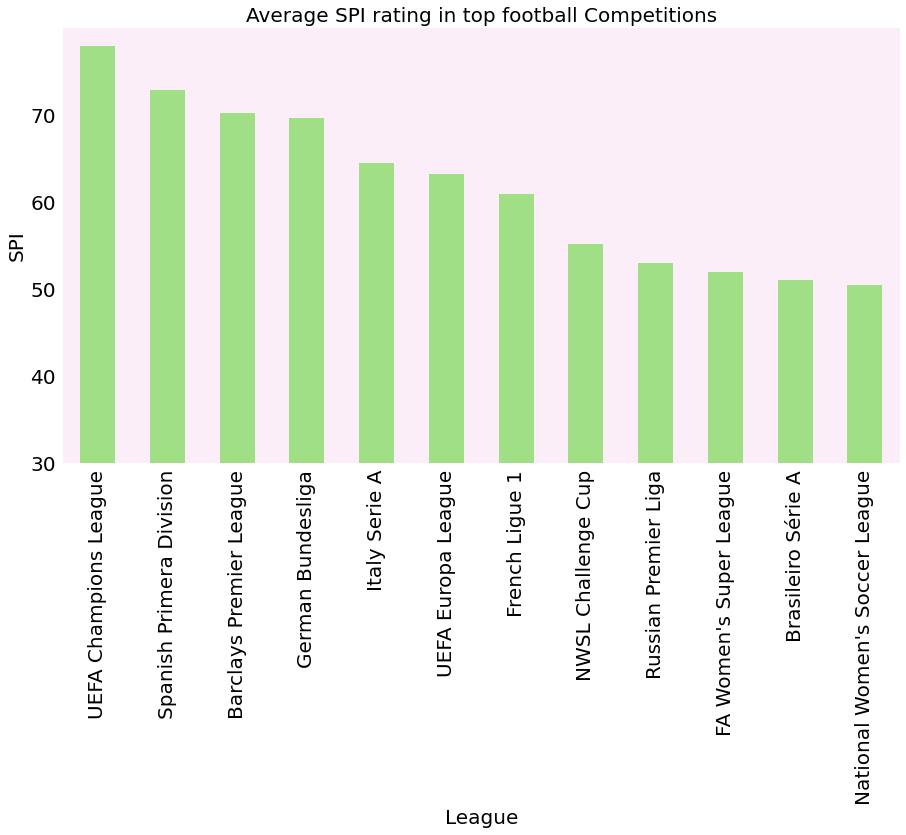

In [9]:
# Plot highest SPI averages for leagues
import numpy as np
grouped_data = football_data.groupby("league")["spi1"].agg(np.mean)
grouped_data = grouped_data[grouped_data > 50]
grouped_data = grouped_data.sort_values(ascending=False)

ax1 = grouped_data.plot.bar(figsize=(15,8), color=(0.45,0.85,0.3,0.67,))
ax1.set_facecolor((0.9,0.35,0.8,0.1,))
ax1.set_ylim(30,80)
ax1.set_xlabel("League", size=20)
ax1.set_xticklabels(grouped_data.index, fontsize=20)
ax1.set_yticklabels(range(30,80,10), fontsize=20)
ax1.set_ylabel("SPI", size=20)
ax1.set_title("Average SPI rating in top football Competitions", size=20)
ax1.tick_params(left=False, bottom=False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

This bar chart was created by simply finding the SPI of each team for each match played in the competition and then finding the average SPI. The chart above shows the 12 leagues with the highest average SPI in each match. 

Unsurprisingly, the Champions league is the strongest competition in the dataset. For domestic leagues the Spanish Primera Division strike a blow to the Premier league marketing machine by pipping it to the title of highest quality division. On the Women's side the NWSL is the strongest which may go some way to explaining the World Cup success of the US Women's National team. 

Now, highest quality does not always mean the best entertainment. Too many 7-0 drubbings can often get quite boring. So now let's take a look at which leagues are the most competitive. To do this let's use standard deviation which will judge how far each teams SPI is from the mean of the league. A lower standard deviation will therefore indicate that the teams in the league are closely matched and the games should in theory be more even>

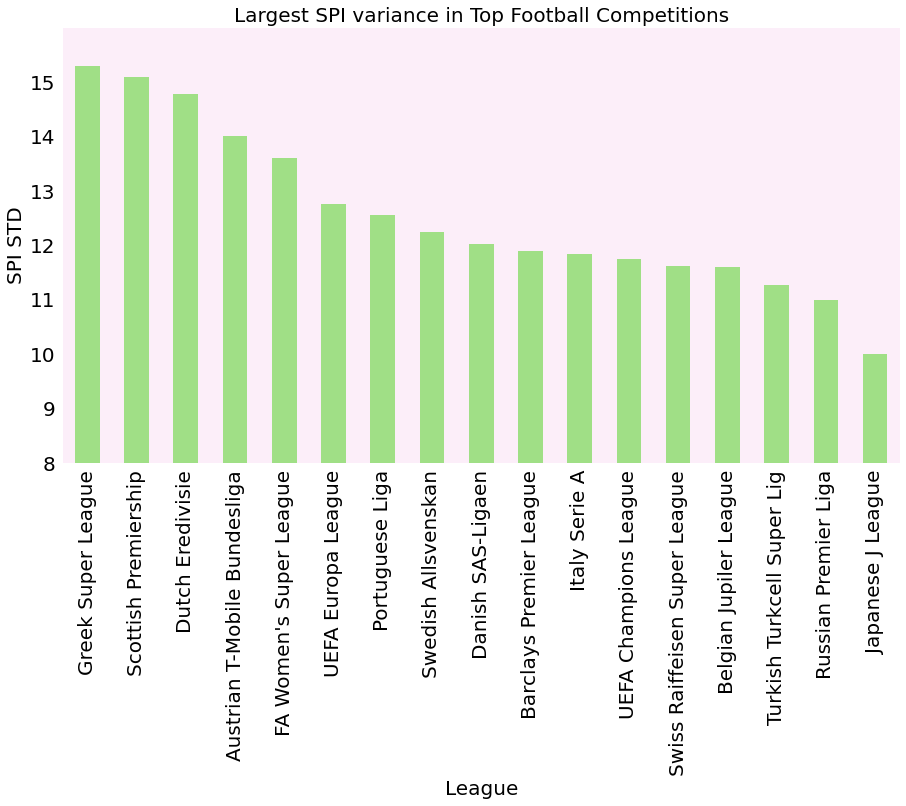

In [10]:
# Plot largets STD for leagues
grouped_data_std = football_data.groupby("league")["spi1"].agg(np.std)

grouped_data_std_top = grouped_data_std[grouped_data_std > 10]
grouped_data_std_top = grouped_data_std_top.sort_values(ascending=False)

ax1 = grouped_data_std_top.plot.bar(figsize=(15,8), color=(0.45,0.85,0.3,0.67,))
ax1.set_facecolor((0.9,0.35,0.8,0.1,))
ax1.set_ylim(8,16)
ax1.set_xlabel("League", size=20)
ax1.set_xticklabels(grouped_data_std_top.index, fontsize=20)
ax1.set_yticklabels(range(8,16,1), fontsize=20)
ax1.set_ylabel("SPI STD", size=20)
ax1.set_title("Largest SPI variance in Top Football Competitions", size=20)
ax1.tick_params(left=False, bottom=False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

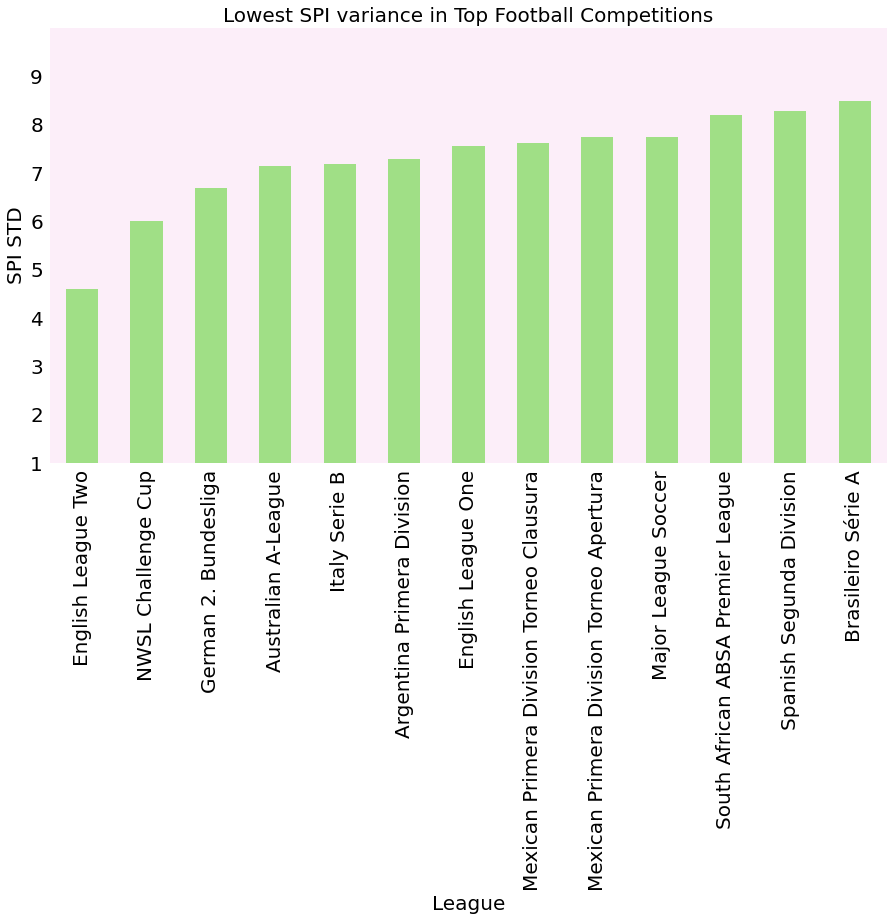

In [11]:
# Plot lowest std for leagues
grouped_data_std_low = grouped_data_std[grouped_data_std < 8.5]
grouped_data_std_low = grouped_data_std_low.sort_values(ascending=True)

ax1 = grouped_data_std_low.plot.bar(figsize=(15,8), color=(0.45,0.85,0.3,0.67,))
ax1.set_facecolor((0.9,0.35,0.8,0.1,))
ax1.set_ylim(1,10)
ax1.set_xlabel("League", size=20)
ax1.set_xticklabels(grouped_data_std_low.index, fontsize=20)
ax1.set_yticklabels(range(1,10,1), fontsize=20)
ax1.set_ylabel("SPI STD", size=20)
ax1.set_title("Lowest SPI variance in Top Football Competitions", size=20)
ax1.tick_params(left=False, bottom=False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

So, the leagues with the highest variance between teams are the Greek Super League, Scottish Premier and Dutch Eridivise. To anyone familiar with these leagues this should come as no surprise. Teams like Celtic, Rangers, Ajax, PSA, Olympiakos and Panathanikos have dominated these divisions for years. You shouldn't need SPI to tell you that there is a big difference between Celtic and Ross County.

On the other side of things we have the English league 2 has the league with the least variance. This league is the lowest quality according to SPI which leads to the theory that the lower down the football pyramid you go the more even things become. There are no Russian Oligarchs spending hundreds of millions of pounds in league 2. Before looking a little closer at this theory it should be pointed out that the NSWL has the second least variance and the 8th highest quality. Maybe a good league to check out!

Anyway, let's take a closer look at our top 4 highest quality domestic leagues and see how the distribution of SPI's compare to the rest. I will use a Kernel density estimate(a smooth histogram) to see how the SPI's are distributed.

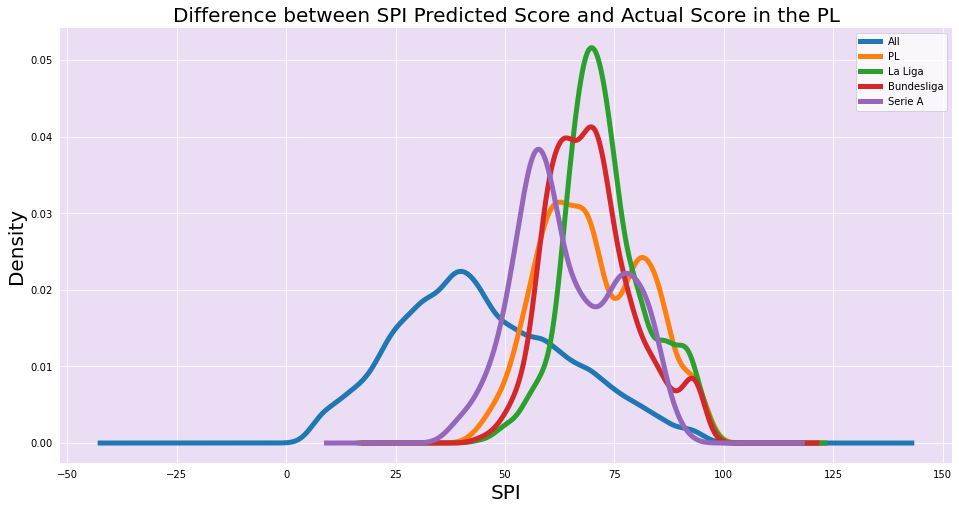

In [12]:
# Plot top leagues 
import matplotlib.pyplot as plt

pl = football_data[football_data["league"] == "Barclays Premier League"].copy()
la_liga = football_data[football_data["league"] == "Spanish Primera Division"].copy()
bundesliga = football_data[football_data["league"] == "German Bundesliga"].copy()
serie_a = football_data[football_data["league"] == "Italy Serie A"].copy()
french = football_data[football_data["league"] == "French ligue 1"].copy()

ax1 = football_data["spi1"].plot.kde(label="All", figsize=(16,8), linewidth=5)
ax1 = pl["spi1"].plot.kde(label="PL", linewidth=5)
ax1 = la_liga["spi1"].plot.kde(label="La Liga", linewidth=5)
ax1 = bundesliga["spi1"].plot.kde(label="Bundesliga", linewidth=5)
ax1 = serie_a["spi1"].plot.kde(label="Serie A", linewidth=5)


ax1.set_facecolor((0.6,0.35,0.8,0.2,))
ax1.grid(c='w')
ax1.legend()
ax1.set_xlabel("SPI", size=20)
ax1.set_ylabel("Density", size=20)
ax1.set_title("Difference between SPI Predicted Score and Actual Score in the PL", size=20)
ax1.tick_params(left=False, bottom=False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

Take a look at the 4 charts for the top four domestic leagues. They all have one major peak where the majority of the teams are and then a secondary bump with higher SPI for a few clubs. This would indicate that the top leagues are fairly even but then have a small group of elite clubs which are much stronger and therefore make them far more unbalanced. You will see competitve matches in the top leagues but they just won't involve the top teams unless they are playing each other. 

Now, to look at which are the top teams. Firstly, let's do the same as we did with the leagues and see which teams had the highest average SPI for each of their games.

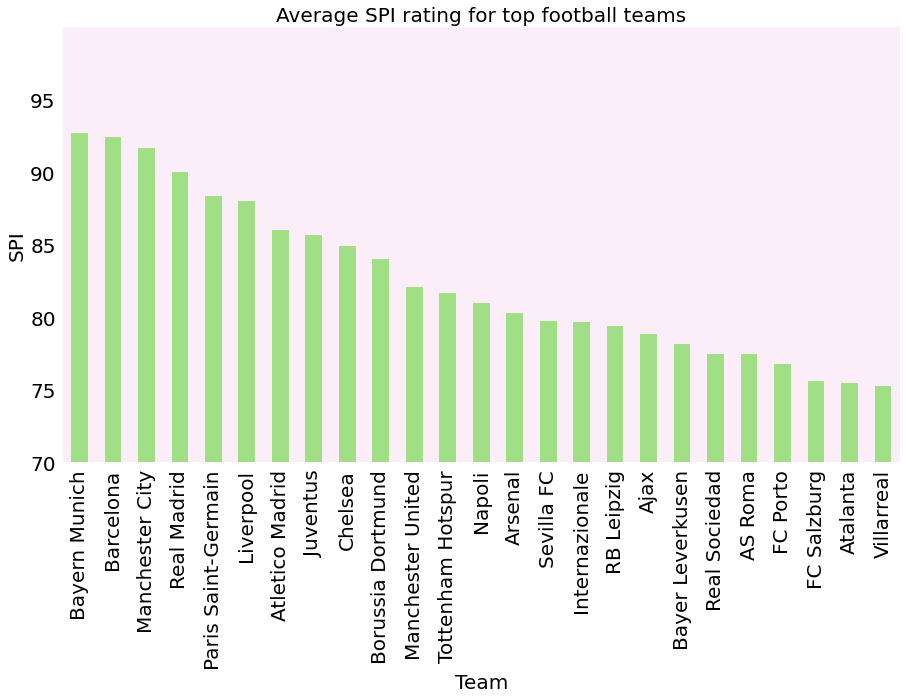

In [13]:
# Plot team SPI averages
team_grouped_data = football_data.groupby("team1")["spi1"].agg(np.mean)
team_grouped_data = team_grouped_data[team_grouped_data > 75]
team_grouped_data = team_grouped_data.sort_values(ascending=False)

ax1 = team_grouped_data.plot.bar(figsize=(15,8), color=(0.45,0.85,0.3,0.67,))
ax1.set_facecolor((0.9,0.35,0.8,0.1,))
ax1.set_ylim(70,100)
ax1.set_xlabel("Team", size=20)
ax1.set_xticklabels(team_grouped_data.index, fontsize=20)
ax1.set_yticklabels(range(70,100,5), fontsize=20)
ax1.set_ylabel("SPI", size=20)
ax1.set_title("Average SPI rating for top football teams", size=20)
ax1.tick_params(left=False, bottom=False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

According to SPI the best team over the past 5 seasons has been Bayern Munich. Since they have won the Champions league in 2020 and the Bundesliga in each season this is a reasonable verdict. Bayern are followed by Barcelona and Man City, two teams that haven't won the Champions League since 2016-17 (never in City's case), and then Real Madrid who won it twice. Let's see why Real aren't higher by tracking each of the top 6's SPI over the time period we have available. 

In [14]:
# Group data into individual teams
grouped_teams_spi1 = football_data.groupby('team1')['spi1']
grouped_teams_spi2 = football_data.groupby('team2')['spi2']
grouped_teams_date1 = football_data.groupby('team1')['date']
grouped_teams_date2 = football_data.groupby('team2')['date']

bayern_spi1 = grouped_teams_spi1.get_group('Bayern Munich')
bayern_spi2 = grouped_teams_spi2.get_group('Bayern Munich')
bayern_dates1 = grouped_teams_date1.get_group('Bayern Munich')
bayern_dates2 = grouped_teams_date2.get_group('Bayern Munich')

bayern = pd.concat([bayern_dates1, bayern_dates2, bayern_spi1, bayern_spi2], axis=1)
bayern.columns = ["date", "date2", "spi", "spi2"]
bayern["date"].fillna(bayern["date2"], inplace=True)
bayern["spi"].fillna(bayern["spi2"], inplace=True)
bayern = bayern.drop(['date2', 'spi2'], axis=1)


barca_spi1 = grouped_teams_spi1.get_group('Barcelona')
barca_spi2 = grouped_teams_spi2.get_group('Barcelona')
barca_dates1 = grouped_teams_date1.get_group('Barcelona')
barca_dates2 = grouped_teams_date2.get_group('Barcelona')

barca = pd.concat([barca_dates1, barca_dates2, barca_spi1, barca_spi2], axis=1)
barca.columns = ["date", "date2", "spi", "spi2"]
barca["date"].fillna(barca["date2"], inplace=True)
barca["spi"].fillna(barca["spi2"], inplace=True)
barca = barca.drop(['date2', 'spi2'], axis=1)


city_spi1 = grouped_teams_spi1.get_group('Manchester City')
city_spi2 = grouped_teams_spi2.get_group('Manchester City')
city_dates1 = grouped_teams_date1.get_group('Manchester City')
city_dates2 = grouped_teams_date2.get_group('Manchester City')

city = pd.concat([city_dates1, city_dates2, city_spi1, city_spi2], axis=1)
city.columns = ["date", "date2", "spi", "spi2"]
city["date"].fillna(city["date2"], inplace=True)
city["spi"].fillna(city["spi2"], inplace=True)
city = city.drop(['date2', 'spi2'], axis=1)


real_spi1 = grouped_teams_spi1.get_group('Real Madrid')
real_spi2 = grouped_teams_spi2.get_group('Real Madrid')
real_dates1 = grouped_teams_date1.get_group('Real Madrid')
real_dates2 = grouped_teams_date2.get_group('Real Madrid')

real = pd.concat([real_dates1, real_dates2, real_spi1, real_spi2], axis=1)
real.columns = ["date", "date2", "spi", "spi2"]
real["date"].fillna(real["date2"], inplace=True)
real["spi"].fillna(real["spi2"], inplace=True)
real = real.drop(['date2', 'spi2'], axis=1)


psg_spi1 = grouped_teams_spi1.get_group('Paris Saint-Germain')
psg_spi2 = grouped_teams_spi2.get_group('Paris Saint-Germain')
psg_dates1 = grouped_teams_date1.get_group('Paris Saint-Germain')
psg_dates2 = grouped_teams_date2.get_group('Paris Saint-Germain')

psg = pd.concat([psg_dates1, psg_dates2, psg_spi1, psg_spi2], axis=1)
psg.columns = ["date", "date2", "spi", "spi2"]
psg["date"].fillna(psg["date2"], inplace=True)
psg["spi"].fillna(psg["spi2"], inplace=True)
psg = psg.drop(['date2', 'spi2'], axis=1)


liverpool_spi1 = grouped_teams_spi1.get_group('Liverpool')
liverpool_spi2 = grouped_teams_spi2.get_group('Liverpool')
liverpool_dates1 = grouped_teams_date1.get_group('Liverpool')
liverpool_dates2 = grouped_teams_date2.get_group('Liverpool')

liverpool = pd.concat([liverpool_dates1, liverpool_dates2, liverpool_spi1, liverpool_spi2], axis=1)
liverpool.columns = ["date", "date2", "spi", "spi2"]
liverpool["date"].fillna(liverpool["date2"], inplace=True)
liverpool["spi"].fillna(liverpool["spi2"], inplace=True)
liverpool = liverpool.drop(['date2', 'spi2'], axis=1)

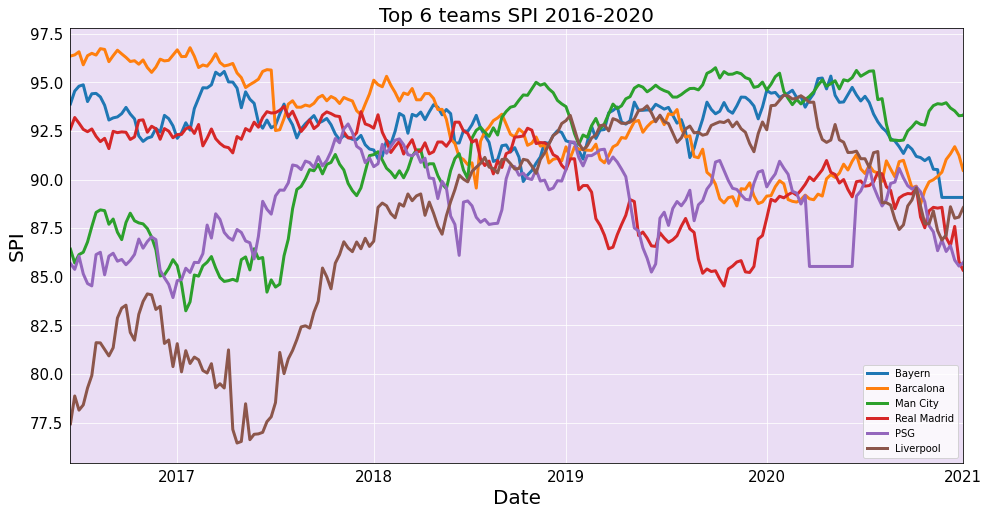

In [15]:
# Plot SPI over time
fig = plt.figure(figsize=(16,8))
ax1 =plt.axes()

plt.plot(range(219), bayern["spi"], linewidth=3, label="Bayern")
plt.plot(range(239), barca["spi"], linewidth=3, label="Barcalona")
plt.plot(range(235), city["spi"], linewidth=3, label="Man City")
plt.plot(range(240), real["spi"], linewidth=3, label="Real Madrid")
plt.plot(range(233), psg["spi"], linewidth=3, label="PSG")
plt.plot(range(232), liverpool["spi"], linewidth=3, label="Liverpool")



plt.xlim(0, 209)
plt.xticks(ticks=[25,71,116, 163, 209], labels=["2017" ,"2018" ,"2019", "2020", "2021"], size=15)
plt.yticks(size=15)
plt.grid(c='w')
plt.legend()
plt.xlabel("Date", size=20)
plt.ylabel("SPI", size=20)
plt.title("Top 6 teams SPI 2016-2020", size=20)
plt.tick_params(left=False, bottom=False)
ax1.set_facecolor((0.6,0.35,0.8,0.2,))


Despite winning the Champions League twice Madrid never actually have the highest SPI. SPI seems to favour teams who consistently perform well in the league (Barca, Bayern and City all won more domestic leagues than Real during this timeframe). One impressive aspect of this chart is the rapid rise of Liverpool from 2017 to 2020.

Now we've made a lot of judgements here based on SPI, but is that smart? Is SPI a good measure of how good teams are> Remember Silver said that SPI is forward looking so let's see. How well did Spi do at predicting results. The dataset contains columns for projected scores. One column for the projected score of the home team and one for away. Lets have a look at the difference between these projections and how many goals the home and away team actually scored. Again I am going to use a KDE chart. The more values that are closer to zero then the more accurate SPI is. A value of 0 means that there was no difference between the projection and how many goals were actually scored by the home and away team. 

# SPI Prediction Accuracy

In [16]:
# Create new columns
football_data_16_19 = football_data[football_data["season"] != 2020].copy()

football_data_16_19["score1_diff"] = football_data_16_19["proj_score1"] - football_data_16_19["score1"]
football_data_16_19["score2_diff"] = football_data_16_19["proj_score2"] - football_data_16_19["score2"]


pl_update = football_data_16_19[football_data_16_19["league"] == "Barclays Premier League"].copy()


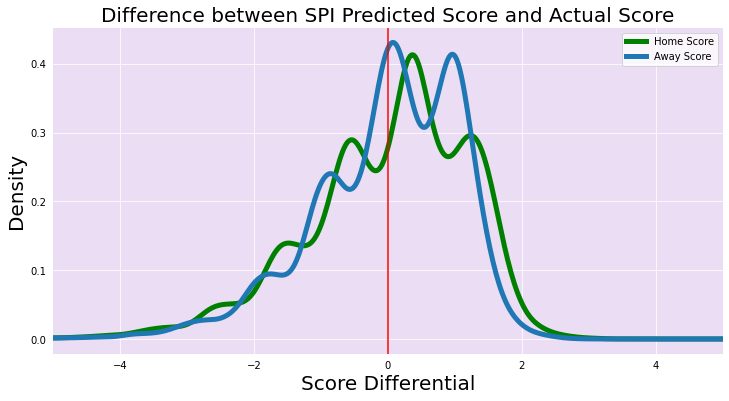

In [17]:
# Plot spi vs actual goals
football_data_16_19 = football_data[football_data["season"] != 2020].copy()

football_data_16_19["score1_diff"] = football_data_16_19["proj_score1"] - football_data_16_19["score1"]
football_data_16_19["score2_diff"] = football_data_16_19["proj_score2"] - football_data_16_19["score2"]


pl_update = football_data_16_19[football_data_16_19["league"] == "Barclays Premier League"].copy()

ax1 = football_data_16_19["score1_diff"].plot.kde(figsize=(12,6), c="g", label="Home Score", linewidth=5)
ax1 = football_data_16_19["score2_diff"].plot.kde(label="Away Score", linewidth=5)
ax1.set_xlim(-5, 5)
ax1.axvline(0, c="r")
ax1.set_facecolor((0.6,0.35,0.8,0.2,))
ax1.grid(c='w')
ax1.legend()
ax1.set_xlabel("Score Differential", size=20)
ax1.set_ylabel("Density", size=20)
ax1.set_title("Difference between SPI Predicted Score and Actual Score", size=20)
ax1.tick_params(left=False, bottom=False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

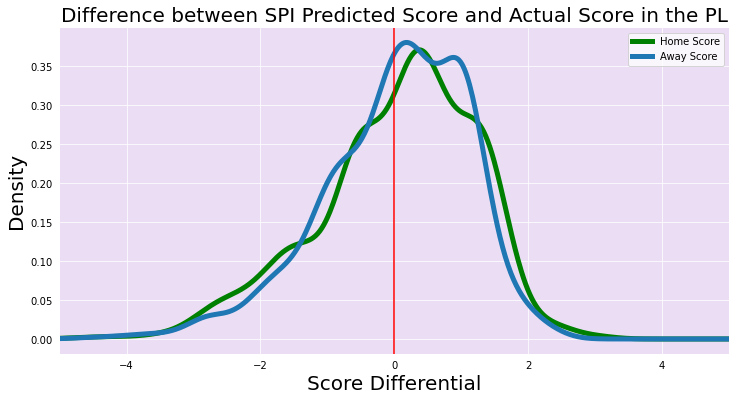

In [18]:
# Plot Spi vs actual goals in PL
ax1 = pl_update["score1_diff"].plot.kde(figsize=(12,6), c="g", label="Home Score", linewidth=5)
ax1 = pl_update["score2_diff"].plot.kde(label="Away Score", linewidth=5)
ax1.set_xlim(-5, 5)
ax1.axvline(0, c="r")
ax1.set_facecolor((0.6,0.35,0.8,0.2,))
ax1.grid(c='w')
ax1.legend()
ax1.set_xlabel("Score Differential", size=20)
ax1.set_ylabel("Density", size=20)
ax1.set_title("Difference between SPI Predicted Score and Actual Score in the PL", size=20)
ax1.tick_params(left=False, bottom=False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

Pretty good! We do have a lot of values close to zero. There is, however, a slight shift to the right. SPI seems to be slightly overprojecting how many goals will be scored. The math used was projected score - actual score. A positive value therefore means the projected score was higher. 

I also just looked at the PL predictions to see if SPI did better with a more high profile league and again there is a slight shift to the right but SPI still does a pretty good job.

Now those are just the scores. Most people don't care about the score as long as their teams wins. So how good is SPI at predicting the final result?

In [19]:
# Create conditions for winning, losing or drawing
conditions = [
    (football_data_16_19['prob1'] > football_data_16_19['prob2']) & 
    (football_data_16_19['prob1'] > football_data_16_19['probtie']),
    
    (football_data_16_19['prob2'] > football_data_16_19['prob1']) & 
    (football_data_16_19['prob2'] > football_data_16_19['probtie']),
    
    (football_data_16_19['probtie'] > football_data_16_19['prob2']) & 
    (football_data_16_19['probtie'] > football_data_16_19['prob1'])
]

values = [1, 2, 3]

football_data_16_19['Predicted Winner'] = np.select(conditions, values)

conditions = [
    (football_data_16_19['score1'] > football_data_16_19['score2']),
    
    (football_data_16_19['score2'] > football_data_16_19['score1']),
    
    (football_data_16_19['score1'] == football_data_16_19['score2']) 
]

values = [1, 2, 3]

football_data_16_19['Actual Winner'] = np.select(conditions, values)

football_data_16_19["Correct Prediction"] = np.where(football_data_16_19["Predicted Winner"] == football_data_16_19["Actual Winner"], True, False)

In [20]:
football_data_16_19["proj_score_diff"] = football_data_16_19["proj_score1"] - football_data_16_19["proj_score2"]
clear_favs = football_data_16_19[(football_data_16_19["proj_score_diff"] > 1) | (football_data_16_19["proj_score_diff"] < -1)]
very_clear_favs = football_data_16_19[(football_data_16_19["proj_score_diff"] > 2) | (football_data_16_19["proj_score_diff"] < -2)]
red_hot = football_data_16_19[(football_data_16_19["proj_score_diff"] > 3) | (football_data_16_19["proj_score_diff"] < -3)]
cant_lose = football_data_16_19[(football_data_16_19["proj_score_diff"] > 4) | (football_data_16_19["proj_score_diff"] < -4)]
favs = football_data_16_19[(football_data_16_19["proj_score_diff"] > 0.5) | (football_data_16_19["proj_score_diff"] < -0.5)]

Text(0.5, 1.0, 'Fav by 4+')

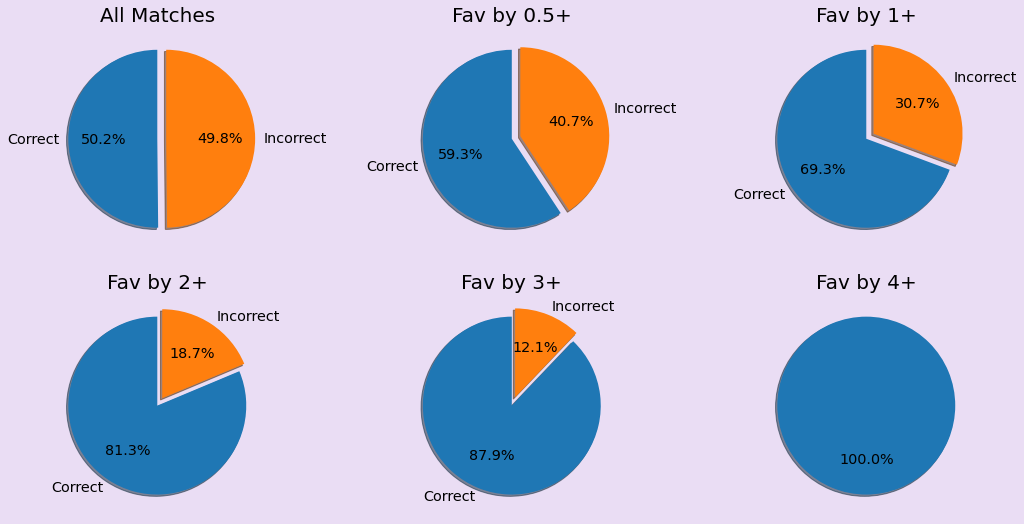

In [21]:
# Plot pie charts for result accuracy
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2, 3, figsize=(18,9), facecolor=(0.6,0.35,0.8,0.2,))

axs[0, 0].pie(football_data_16_19["Correct Prediction"].value_counts(normalize=True), labels=("Correct", "Incorrect"), explode=(0, 0.1),
             shadow=True, startangle=90, autopct='%1.1f%%', textprops={'size': 'x-large'})
axs[0, 0].set_title("All Matches", size=20)

axs[0, 1].pie(favs["Correct Prediction"].value_counts(normalize=True), labels=("Correct", "Incorrect"), explode=(0, 0.1),
             shadow=True, startangle=90, autopct='%1.1f%%', textprops={'size': 'x-large'})
axs[0, 1].set_title("Fav by 0.5+", size=20)

axs[0, 2].pie(clear_favs["Correct Prediction"].value_counts(normalize=True), labels=("Correct", "Incorrect"), explode=(0, 0.1),
             shadow=True, startangle=90, autopct='%1.1f%%', textprops={'size': 'x-large'})
axs[0, 2].set_title("Fav by 1+", size=20)

axs[1, 0].pie(very_clear_favs["Correct Prediction"].value_counts(normalize=True), labels=("Correct", "Incorrect"), explode=(0, 0.1),
             shadow=True, startangle=90, autopct='%1.1f%%', textprops={'size': 'x-large'})
axs[1, 0].set_title("Fav by 2+", size=20)

axs[1, 1].pie(red_hot["Correct Prediction"].value_counts(normalize=True), labels=("Correct", "Incorrect"), explode=(0, 0.1),
             shadow=True, startangle=90, autopct='%1.1f%%', textprops={'size': 'x-large'})
axs[1, 1].set_title("Fav by 3+", size=20)

axs[1, 2].pie(cant_lose["Correct Prediction"].value_counts(normalize=True), shadow=True, startangle=90, autopct='%1.1f%%', textprops={'size': 'x-large'})
axs[1, 2].set_title("Fav by 4+", size=20)


For all matches the predictions are only right about 50/50 that sounds awful! But remember that there are 3 possible outcomes in football. Win, loss or tie. If SPI had no predictive power then it would be around 33% not 50%. We can see how SPI improves the greater it favours a team to win by. If you are making bets based on SPI projections you may not have much luck if the projections are close (neither team to outscore the other by 0.5 or more) but the greater the difference the more accurate SPI gets. It's not perfect, however, unless SPI is predicting at least a 4 goal margin of victory and you can see those games below. 

In [22]:
# Show matches with projection +4
cant_lose

,season,date,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,xg1,xg2,nsxg1,nsxg2,score1_diff,score2_diff,Predicted Winner,Actual Winner,Correct Prediction,proj_score_diff
19385,2018,2019-03-10,Dutch Eredivisie,Ajax,Fortuna Sittard,84.88,31.29,0.9673,0.0066,0.0261,4.90,0.45,4.0,0.0,NaN,NaN,NaN,NaN,0.90,0.45,1,1,True,4.45
20590,2018,2019-04-13,Dutch Eredivisie,Ajax,Excelsior,83.54,25.80,0.9677,0.0039,0.0284,4.22,0.20,6.0,2.0,NaN,NaN,NaN,NaN,-1.78,-1.80,1,1,True,4.02
25272,2019,2019-09-25,Dutch Eredivisie,Ajax,Fortuna Sittard,82.70,27.00,0.9606,0.0073,0.0321,4.41,0.37,5.0,0.0,NaN,NaN,NaN,NaN,-0.59,0.37,1,1,True,4.04
28123,2019,2019-12-07,Austrian T-Mobile Bundesliga,FC Salzburg,WSG Swarovski Wattens,81.50,25.54,0.9665,0.0064,0.0270,4.40,0.33,5.0,1.0,NaN,NaN,NaN,NaN,-0.60,-0.67,1,1,True,4.07


There are those that say a lot of football is just luck. That a more accurate way to judge who the better team was is to look at the xg (expected goals) so let's see. Maybe SPI is more accurate at predicting which team will perform better accoring to xg. In the chart below I will be using xg difference which is just a teams xg scored - xg conceded.

In [23]:
# Calculate xg Difference
team_grouped_data = football_data.groupby("team1")["spi1"].agg(np.mean)
xg_grouped_data_1 = football_data.groupby("team1")["xg1"].agg(np.mean)
xg_grouped_data_1 = xg_grouped_data_1.sort_values(ascending=False)
xg_grouped_data_2 = football_data.groupby("team2")["xg2"].agg(np.mean)
xg_grouped_data_2 = xg_grouped_data_2.sort_values(ascending=False)



xg_grouped = pd.concat([xg_grouped_data_1, xg_grouped_data_2], axis=1)
xg_grouped["xg"] = (xg_grouped["xg1"] + xg_grouped["xg2"]) / 2

xg_grouped.drop(["xg1", "xg2"], axis=1, inplace=True)

xg_grouped_data_3 = football_data.groupby("team1")["xg2"].agg(np.mean)
xg_grouped_data_3 = xg_grouped_data_3.sort_values(ascending=False)
xg_grouped_data_4 = football_data.groupby("team2")["xg1"].agg(np.mean)
xg_grouped_data_4 = xg_grouped_data_4.sort_values(ascending=False)


xg_grouped_2 = pd.concat([xg_grouped_data_3, xg_grouped_data_4], axis=1)
xg_grouped_2["xg_against"] = (xg_grouped_2["xg1"] + xg_grouped_2["xg2"]) / 2
xg_grouped_2.drop(["xg1", "xg2"], axis=1, inplace=True)



xg_spi = pd.concat([xg_grouped,xg_grouped_2, team_grouped_data], axis=1)
xg_spi["xg_diff"] = xg_spi["xg"] - xg_spi["xg_against"]


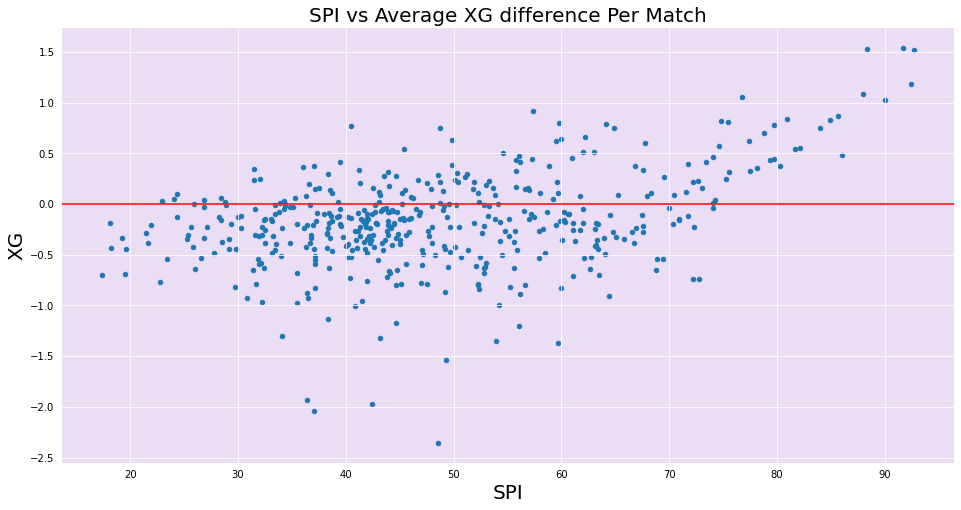

In [24]:
# Plot SPI vs XG
ax1 = xg_spi.plot(x="spi1", y="xg_diff", kind='scatter', figsize=(16,8))
ax1.set_facecolor((0.6,0.35,0.8,0.2,))
ax1.grid(c='w')
ax1.set_xlabel("SPI", size=20)
ax1.set_ylabel("XG", size=20)
ax1.set_title("SPI vs Average XG difference Per Match", size=20)
ax1.tick_params(left=False, bottom=False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.axhline(0, c="r")

On the x axis we have SPI and XG difference on the y axis. For the most part teams between 30 and 70 SPI don't seem to fare much better when it comes to XG differential. It's only for the stronger teams above 70 that we can see correlation.

Before assuming SPI can't predict XG difference it should be pointed out that teams generally play other teams at their own level. A team with 60 SPI will on average play much better teams than a team with a 20 SPI. So, let's ignore these and just focus on the strong teams where we do have correlation. This correlation comes from the elite teams before that were causing the second bumps in our KDE charts. These eilite teams are therefore more likley to play against teams below their SPI level than the weaker teams. So, let's do a chart with just these elite teams. 

Text(81.1, 0.53, 'Spurs')

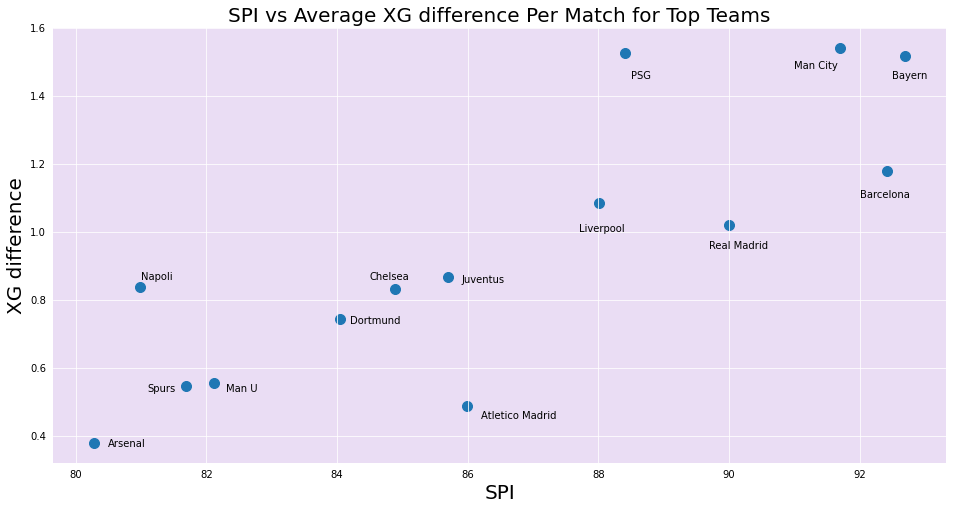

In [25]:
# Plot top SPI vs XG Diff
xg_spi_best = xg_spi[xg_spi["spi1"] > 80]

ax1 = xg_spi_best.plot(x="spi1", y="xg_diff", kind='scatter', figsize=(16,8), s=100)
ax1.set_facecolor((0.6,0.35,0.8,0.2,))
ax1.grid(c='w')
ax1.set_xlabel("SPI", size=20)
ax1.set_ylabel("XG difference", size=20)
ax1.set_title("SPI vs Average XG difference Per Match for Top Teams", size=20)
ax1.tick_params(left=False, bottom=False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

ax1.text(86.2, 0.45, 'Atletico Madrid')
ax1.text(88.5, 1.45, 'PSG')
ax1.text(92.5, 1.45, 'Bayern')
ax1.text(91, 1.48, 'Man City')
ax1.text(92, 1.10, 'Barcelona')
ax1.text(89.7, 0.95, 'Real Madrid')
ax1.text(87.7, 1, 'Liverpool')
ax1.text(85.9, 0.85, 'Juventus')
ax1.text(84.2, 0.73, 'Dortmund')
ax1.text(84.5, 0.86, 'Chelsea')
ax1.text(81, 0.86, 'Napoli')
ax1.text(80.5, 0.37, 'Arsenal')
ax1.text(82.3, 0.53, 'Man U')
ax1.text(81.1, 0.53, 'Spurs')

There is some strong correlation. For the elite teams SPI does seem to do a good job of predicting XG difference. A couple of outliers would be that SPI overrates Atletico and underrates PSG and Napoli. As we did with SPI and actual goals scored lets make a KDE chart to see how similar SPI projections are to how many goals XG thinks there should have been. Remember the more that are close to zero the better.

In [26]:
# New XG and NSXG columns
pl_update["xg_diff1"] = pl_update["xg1"] - pl_update["score1"]
pl_update["xg_diff2"] = pl_update["xg2"] - pl_update["score2"]

pl_update["nsxg_diff1"] = pl_update["nsxg1"] - pl_update["score1"]
pl_update["nsxg_diff2"] = pl_update["nsxg2"] - pl_update["score2"]

pl_update["proj_vs_xg1"] = pl_update["proj_score1"] - pl_update["xg1"]
pl_update["proj_vs_xg2"] = pl_update["proj_score2"] - pl_update["xg2"]

pl_update["proj_vs_nsxg1"] = pl_update["proj_score1"] - pl_update["nsxg1"]
pl_update["proj_vs_nsxg2"] = pl_update["proj_score2"] - pl_update["nsxg2"]

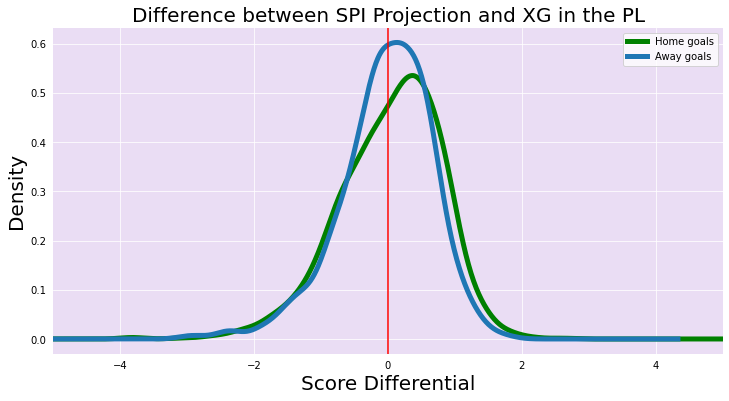

In [27]:
# Plot SPI and XG
ax1 = pl_update["proj_vs_xg1"].plot.kde(figsize=(12,6), c="g", label="Home goals", linewidth=5)
ax1 = pl_update["proj_vs_xg2"].plot.kde(label="Away goals", linewidth=5)
ax1.set_xlim(-5, 5)
ax1.axvline(0, c="r")
ax1.set_facecolor((0.6,0.35,0.8,0.2,))
ax1.grid(c='w')
ax1.legend()
ax1.set_xlabel("Score Differential", size=20)
ax1.set_ylabel("Density", size=20)
ax1.set_title("Difference between SPI Projection and XG in the PL", size=20)
ax1.tick_params(left=False, bottom=False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

Good again! Like with actual goals SPI does overshoot slightly and predicts slightly more goals than xg thinks there should have been. In the dataset we actually have another stat NSXG which also factors in goal scoring chances where the attacking player has a chance to score but doesn't take a shot. Let's see how similar the SPI projection is to how many goals NSXG says there should have been.  

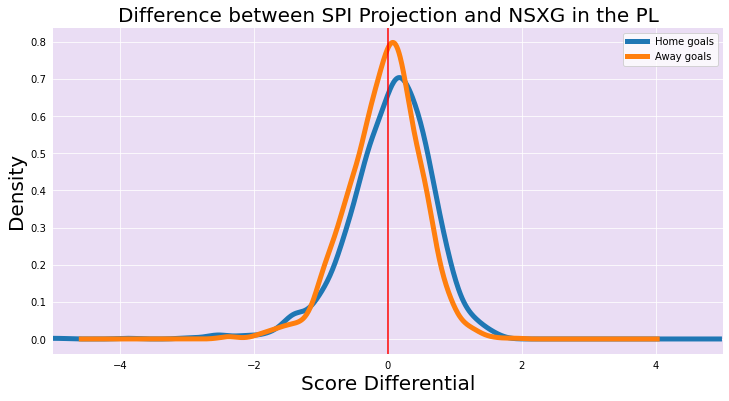

In [28]:
# Plot SPI and NSXG
ax1 = pl_update["proj_vs_nsxg1"].plot.kde(figsize=(12,6), label="Home goals", linewidth=5)
ax1 = pl_update["proj_vs_nsxg2"].plot.kde(label="Away goals", linewidth=5)
ax1.set_xlim(-5, 5)
ax1.axvline(0, c="r")
ax1.set_facecolor((0.6,0.35,0.8,0.2,))
ax1.grid(c='w')
ax1.legend()
ax1.set_xlabel("Score Differential", size=20)
ax1.set_ylabel("Density", size=20)
ax1.set_title("Difference between SPI Projection and NSXG in the PL", size=20)
ax1.tick_params(left=False, bottom=False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

Wow, look at that, all very close to zero. Good job SPI. Of course none of this matters if there is not a strong correlation between XG and NSXG and with actual goals. So let's check:

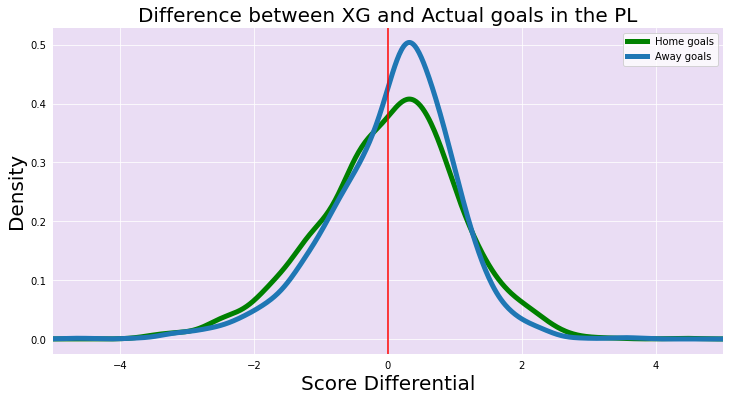

In [29]:
# Plot XG and goals
ax1 = pl_update["xg_diff1"].plot.kde(figsize=(12,6), c="g", label="Home goals", linewidth=5)
ax1 = pl_update["xg_diff2"].plot.kde(label="Away goals", linewidth=5)
ax1.set_xlim(-5, 5)
ax1.axvline(0, c="r")
ax1.set_facecolor((0.6,0.35,0.8,0.2,))
ax1.grid(c='w')
ax1.legend()
ax1.set_xlabel("Score Differential", size=20)
ax1.set_ylabel("Density", size=20)
ax1.set_title("Difference between XG and Actual goals in the PL", size=20)
ax1.tick_params(left=False, bottom=False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

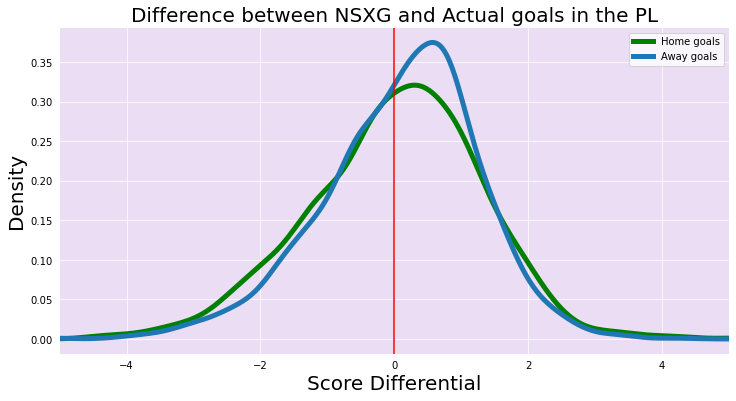

In [30]:
# Plot NSXG and Goals
ax1 = pl_update["nsxg_diff1"].plot.kde(figsize=(12,6), c="g", label="Home goals", linewidth=5)
ax1 = pl_update["nsxg_diff2"].plot.kde(label="Away goals", linewidth=5)
ax1.set_xlim(-5, 5)
ax1.axvline(0, c="r")
ax1.set_facecolor((0.6,0.35,0.8,0.2,))
ax1.grid(c='w')
ax1.legend()
ax1.set_xlabel("Score Differential", size=20)
ax1.set_ylabel("Density", size=20)
ax1.set_title("Difference between NSXG and Actual goals in the PL", size=20)
ax1.tick_params(left=False, bottom=False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

Pretty close again and both XG and NSXG both say there should have been more goals in these games. Perhaps SPI was doing a great job and some poor finishing from the players ont he pitch let it down!

# Final Thoughts

- SPI is good, but not quite perfect. It's projections slightly overestimate how many goals there will be in each match on average.
- For results SPI also does a good job with room for improvement. It's not until the projections expect a margin of at least 2 goals that you can feel confident.
- SPI is slightly better at predicting XG and NSXG than it is at predicting actual goals.
- SPI never projects a team to score less than 0.2 goals which may be a floor. 
- There is strong correlation between the SPI of elite teams and their XG differential.
- Because of the muddled and competitive nature of lower level football there is no correlation for non elite teams.

**I feel that SPI is a good measure of team quality and we can therefore also make the following statements:**

- Bayern Munich were the consistently best team from 2016 to now.
- La Liga was the strongest domestic league.
- League 2 was the most competitive.
- Don't bother with the Greek Super League,
- For all around entertainment the NWSL may be the best